In [1]:
import os
import glob
import json
import gzip
import pandas as pd

In [3]:
data_dir = '/home/reaf/MOT-analysis/notebooks/mot_data/'
json_files = glob.glob(os.path.join(data_dir, '*.json.gz'))
all_data = []

for i, file_path in enumerate(json_files):
    if i > 100:
        print("Processing limit reached.")
        break
    try:
        file_records = []
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            for i, line in enumerate(f):
                try:
                    if line.strip():  
                        record = json.loads(line)
                        file_records.append(record)
                except json.JSONDecodeError as e:
                    print(f"Error in {os.path.basename(file_path)}, line {i+1}: {str(e)[:100]}")
                    continue
        
        all_data.extend(file_records)
        print(f"Loaded: {os.path.basename(file_path)} - {len(file_records)} records")
    except Exception as e:
        print(f"Failed to process {os.path.basename(file_path)}: {str(e)[:100]}")

# Create DataFrame
if all_data:
    df = pd.DataFrame(all_data)
    
else:
    print("No data was successfully loaded.")

Loaded: delta-light-vehicle_24-03-2025_171.json.gz - 15 records
Loaded: delta-light-vehicle_25-03-2025_265.json.gz - 506 records
Loaded: delta-light-vehicle_25-03-2025_142.json.gz - 499 records
Loaded: delta-light-vehicle_25-03-2025_363.json.gz - 363 records
Loaded: delta-light-vehicle_24-03-2025_24.json.gz - 9 records
Loaded: delta-light-vehicle_24-03-2025_70.json.gz - 6 records
Loaded: delta-light-vehicle_25-03-2025_285.json.gz - 491 records
Loaded: delta-light-vehicle_25-03-2025_196.json.gz - 456 records
Loaded: delta-light-vehicle_24-03-2025_150.json.gz - 6 records
Loaded: delta-light-vehicle_24-03-2025_104.json.gz - 10 records
Loaded: delta-light-vehicle_25-03-2025_165.json.gz - 497 records
Loaded: delta-light-vehicle_24-03-2025_345.json.gz - 12 records
Loaded: delta-light-vehicle_25-03-2025_369.json.gz - 450 records
Loaded: delta-light-vehicle_24-03-2025_128.json.gz - 4 records
Loaded: delta-light-vehicle_24-03-2025_9.json.gz - 5 records
Loaded: delta-light-vehicle_24-03-2025_203

In [4]:
df

,registration,firstUsedDate,registrationDate,manufactureDate,primaryColour,secondaryColour,engineSize,model,make,fuelType,lastMotTestDate,motTests,lastUpdateTimestamp,dataSource,lastUpdateDate,lastRunDate,lastRunTimestamp,modification
0,L13UMG,2008-08-08,2008-08-08,2008-08-08,White,Not Stated,1596.0,FIESTA,FORD,Petrol,2025-03-23T15:24:56.000Z,"[{'completedDate': '2011-08-30T14:52:54.000Z',...",2025-03-23 15:24:56.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
1,RA07HSZ,2007-08-08,2007-08-08,2007-08-08,Silver,Not Stated,2460.0,TRANSPORTER,VOLKSWAGEN,Diesel,2025-03-23T10:16:40.000Z,"[{'completedDate': '2010-09-08T17:31:31.000Z',...",2025-03-23 10:16:40.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
2,YA17USZ,2017-06-29,2017-06-29,2017-06-29,Blue,Not Stated,1995.0,320,BMW,Diesel,2025-03-23T11:44:47.000Z,"[{'completedDate': '2020-06-21T06:58:49.000Z',...",2025-03-23 11:44:47.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
3,NU10MPO,2010-03-19,2010-03-19,2010-03-19,Blue,Not Stated,1598.0,MINI,MINI,Petrol,2025-03-23T16:56:58.000Z,"[{'completedDate': '2013-03-22T09:56:43.000Z',...",2025-03-23 16:56:58.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
4,WO18VNJ,2018-06-22,2018-06-22,2018-06-22,White,Not Stated,1242.0,500,FIAT,Petrol,2025-03-23T13:03:18.000Z,"[{'completedDate': '2021-06-03T08:37:46.000Z',...",2025-03-23 13:03:18.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25504,LT64WND,2014-09-17,2014-09-17,2014-09-17,Red,Not Stated,1984.0,GOLF,VOLKSWAGEN,Petrol,2025-03-23T10:25:45.000Z,"[{'completedDate': '2017-08-23T10:53:58.000Z',...",2025-03-23 10:25:45.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
25505,LN02XJW,2002-03-22,2002-03-22,2002-03-22,Black,Not Stated,2979.0,3 SERIES,BMW,Petrol,2025-03-23T11:48:29.000Z,"[{'completedDate': '2006-03-18T09:34:25.000Z',...",2025-03-23 11:48:29.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
25506,L50MOP,2017-05-20,2017-05-20,2017-05-20,White,Not Stated,1598.0,DUSTER,DACIA,Petrol,2025-03-23T10:33:39.000Z,"[{'completedDate': '2020-05-12T06:31:13.000Z',...",2025-03-23 10:33:39.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
25507,L80KLB,2017-04-18,2017-04-18,2017-04-18,White,Not Stated,2143.0,CLA,MERCEDES-BENZ,Diesel,2025-03-23T14:57:06.000Z,"[{'completedDate': '2019-09-23T14:02:55.000Z',...",2025-03-23 14:57:06.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED


In [5]:
df['registrationDate'] = pd.to_datetime(df['registrationDate'])
df['manufactureDate'] = pd.to_datetime(df['manufactureDate'])
df['firstUsedDate'] = pd.to_datetime(df['firstUsedDate'])

In [6]:
ford_fiesta = df[(df["model"] == "FIESTA") &  (df["make"] == "FORD")].copy()
# Filter for Ford Fiesta mk6 (2008-2017)
ford_fiesta_mk6 = ford_fiesta[(ford_fiesta["registrationDate"] >= pd.to_datetime('2008-01-01')) & 
                             (ford_fiesta["registrationDate"] <= pd.to_datetime('2017-12-31'))]

In [8]:
ford_fiesta_mk6 = ford_fiesta_mk6.reset_index(drop=True)

In [9]:
ford_fiesta_mk6

,registration,firstUsedDate,registrationDate,manufactureDate,primaryColour,secondaryColour,engineSize,model,make,fuelType,lastMotTestDate,motTests,lastUpdateTimestamp,dataSource,lastUpdateDate,lastRunDate,lastRunTimestamp,modification
0,L13UMG,2008-08-08,2008-08-08,2008-08-08,White,Not Stated,1596.0,FIESTA,FORD,Petrol,2025-03-23T15:24:56.000Z,"[{'completedDate': '2011-08-30T14:52:54.000Z',...",2025-03-23 15:24:56.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
1,WV13UXH,2013-04-09,2013-04-09,2013-04-09,Black,Not Stated,1499.0,FIESTA,FORD,Diesel,2025-03-24T12:14:40.000Z,"[{'completedDate': '2016-03-15T16:46:07.000Z',...",2025-03-24 12:14:40.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
2,SJ15LTA,2015-03-31,2015-03-31,2015-03-31,Blue,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T10:53:19.000Z,"[{'completedDate': '2018-09-17T15:03:52.000Z',...",2025-03-24 10:53:19.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
3,SV59NYP,2009-09-04,2009-09-04,2009-09-04,Red,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T15:53:32.000Z,"[{'completedDate': '2012-08-13T09:06:10.000Z',...",2025-03-24 15:53:32.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
4,MH08RAN,2011-03-29,2011-03-29,2011-03-29,White,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T18:44:53.000Z,"[{'completedDate': '2014-03-25T14:30:07.000Z',...",2025-03-24 18:44:53.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,CU63CVG,2013-09-01,2013-09-01,2013-09-01,White,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T10:58:23.000Z,"[{'completedDate': '2016-09-12T08:03:27.000Z',...",2025-03-24 10:58:23.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
645,CV10WFR,2010-04-06,2010-04-06,2010-04-06,Blue,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T15:13:08.000Z,"[{'completedDate': '2013-03-27T10:49:23.000Z',...",2025-03-24 15:13:08.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
646,CV11EZM,2011-03-04,2011-03-04,2011-03-04,White,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T10:47:01.000Z,"[{'completedDate': '2014-03-04T11:18:44.000Z',...",2025-03-24 10:47:01.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
647,CV17LXU,2017-03-27,2017-03-27,2017-03-27,Black,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T15:47:20.000Z,"[{'completedDate': '2020-03-19T16:14:15.000Z',...",2025-03-24 15:47:20.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED


In [ ]:
# Create a new DataFrame to hold all MOT test data
mot_tests_df = []

for index, row in ford_fiesta_mk6.iterrows():
    registration = row['registration']
    manufacture_date = row['manufactureDate']
    
    for test in row['motTests']:
        # Convert completedDate to datetime
        test_date = pd.to_datetime(test['completedDate']).replace(tzinfo=None)

        # pd.to_datetime(mot["completedDate"]).replace(tzinfo=None)
        
        # Calculate age of car at test time (in years)
        car_age_days = (test_date - manufacture_date).days
        car_age_years = car_age_days / 365.25
        
        # Create a record for this test
        test_record = {
            'registration': registration,
            'completedDate': test_date,
            'testResult': test.get('testResult'),
            'odometerValue': test.get('odometerValue'),
            'odometerUnit': test.get('odometerUnit'),
            'expiryDate': test.get('expiryDate'),
            'manufactureDate': manufacture_date,
            'car_age_years': car_age_years,
            'car_age_days': car_age_days
        }
        
                # Add defects if they exist
        if 'defects' in test:
            test_record['defects_detail'] = test['defects']
        if 'defects' in test and test['defects']:
            test_record['has_defects'] = True
            test_record['defect_count'] = len(test['defects'])
        else:
            test_record['has_defects'] = False
            test_record['defect_count'] = 0
            
        mot_tests_df.append(test_record)

# Convert list of dictionaries to DataFrame
mot_tests_df = pd.DataFrame(mot_tests_df)

# Convert expiryDate to datetime if it exists
if 'expiryDate' in mot_tests_df.columns:
    mot_tests_df['expiryDate'] = pd.to_datetime(mot_tests_df['expiryDate'], errors='coerce')

# Sort by registration and test date
mot_tests_df = mot_tests_df.sort_values(['registration', 'completedDate'])

# Display the first few rows
mot_tests_df.head()

,registration,completedDate,testResult,odometerValue,odometerUnit,expiryDate,manufactureDate,car_age_years,car_age_days,defects_detail,has_defects,defect_count
1003,A19KEW,2015-03-31 09:18:27,PASSED,18654.0,MI,2016-04-10,2012-04-10,2.970568,1085,[],False,0
1004,A19KEW,2016-03-30 12:41:50,PASSED,26312.0,MI,2017-04-10,2012-04-10,3.969884,1450,[],False,0
1005,A19KEW,2017-04-08 09:30:07,FAILED,33264.0,MI,NaT,2012-04-10,4.993840,1824,"[{'dangerous': False, 'text': 'Nearside Tyre h...",True,2
1006,A19KEW,2017-04-11 12:55:26,PASSED,33340.0,MI,2018-04-10,2012-04-10,5.002053,1827,[],False,0
1007,A19KEW,2018-04-07 09:43:58,PASSED,39461.0,MI,2019-04-10,2012-04-10,5.990418,2188,[],False,0


In [27]:
mot_tests_df = mot_tests_df.reset_index(drop=True)
mot_tests_df[mot_tests_df["registration"] == "A19KEW"]

,registration,completedDate,testResult,odometerValue,odometerUnit,expiryDate,manufactureDate,car_age_years,car_age_days,defects_detail,has_defects,defect_count
0,A19KEW,2015-03-31 09:18:27,PASSED,18654.0,MI,2016-04-10,2012-04-10,2.970568,1085,[],False,0
1,A19KEW,2016-03-30 12:41:50,PASSED,26312.0,MI,2017-04-10,2012-04-10,3.969884,1450,[],False,0
2,A19KEW,2017-04-08 09:30:07,FAILED,33264.0,MI,NaT,2012-04-10,4.993840,1824,"[{'dangerous': False, 'text': 'Nearside Tyre h...",True,2
3,A19KEW,2017-04-11 12:55:26,PASSED,33340.0,MI,2018-04-10,2012-04-10,5.002053,1827,[],False,0
4,A19KEW,2018-04-07 09:43:58,PASSED,39461.0,MI,2019-04-10,2012-04-10,5.990418,2188,[],False,0
5,A19KEW,2019-03-16 11:28:33,PASSED,44459.0,MI,2020-10-10,2012-04-10,6.929500,2531,[],False,0
6,A19KEW,2020-04-20 11:12:41,PASSED,48794.0,MI,2021-04-19,2012-04-10,8.027379,2932,[],False,0
7,A19KEW,2021-04-07 13:23:53,PASSED,53136.0,MI,2022-04-19,2012-04-10,8.991102,3284,[],False,0
8,A19KEW,2022-04-06 12:37:48,PASSED,57158.0,MI,2023-04-19,2012-04-10,9.987680,3648,[],False,0
9,A19KEW,2023-03-20 13:49:41,FAILED,61224.0,MI,NaT,2012-04-10,10.940452,3996,"[{'dangerous': False, 'text': 'Offside Front C...",True,2


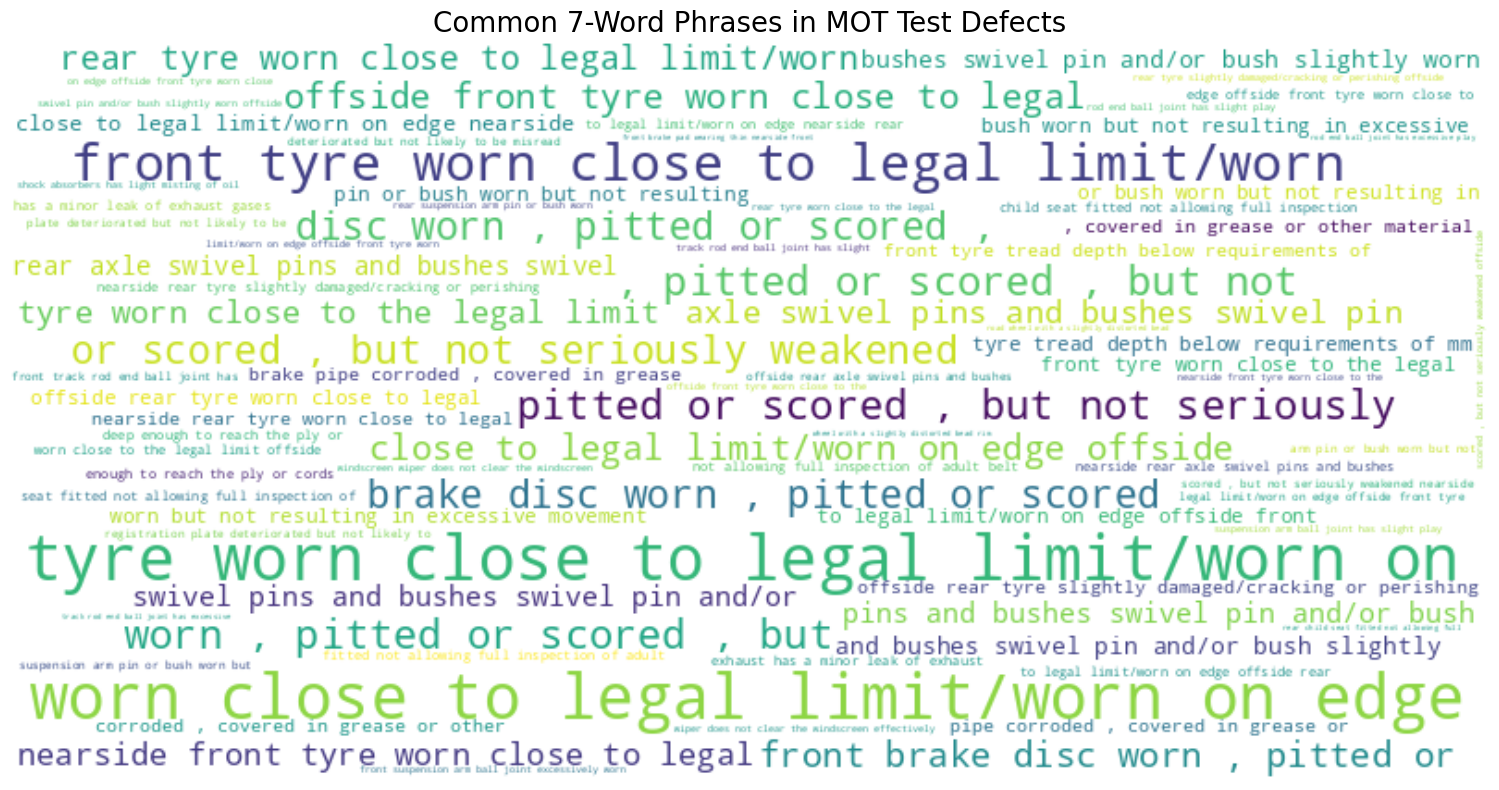

In [25]:
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.util import ngrams

import matplotlib.pyplot as plt

# Download necessary NLTK data if not already downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Extract text from defects_detail column
all_defects = []
for defects in mot_tests_df['defects_detail']:
    if isinstance(defects, list) and defects:
        for defect in defects:
            if isinstance(defect, dict) and 'text' in defect:
                all_defects.append(defect['text'])

# Join all defect texts
text = " ".join(all_defects)

# Clean text
text = re.sub(r'\([^)]*\)', '', text)  # Remove content within parentheses
text = re.sub(r'[\(\)]', '', text)     # Remove remaining parentheses
text = re.sub(r'[0-9.]+', '', text)    # Remove numbers and decimals
text = re.sub(r'\s+', ' ', text)       # Normalize whitespace
text = text.lower()                    # Convert to lowercase

# Create 4-word ngrams
tokens = nltk.word_tokenize(text)
seven_grams = list(ngrams(tokens, 7))
seven_gram_phrases = [' '.join(gram) for gram in seven_grams]

# Count the frequency of each 4-gram
seven_gram_freq = Counter(seven_gram_phrases)

# Filter out very uncommon phrases (optional)
min_count = 2  # Adjust this threshold based on your data
seven_gram_freq = {phrase: count for phrase, count in seven_gram_freq.items() if count >= min_count}

# Create WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    collocations=False  # Turn off automatic bigram detection
).generate_from_frequencies(seven_gram_freq)

# Display the WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common 7-Word Phrases in MOT Test Defects', fontsize=20)
plt.tight_layout()
plt.show()